In [1]:
# install.packages("rstan", repos = 'https://cloud.r-project.org/', dependencies = TRUE)

also installing the dependencies ‘miniUI’, ‘htmlwidgets’, ‘crosstalk’, ‘packrat’, ‘igraph’, ‘matrixStats’, ‘checkmate’, ‘colourpicker’, ‘DT’, ‘dygraphs’, ‘gtools’, ‘rsconnect’, ‘shinyjs’, ‘shinythemes’, ‘threejs’, ‘ggridges’, ‘StanHeaders’, ‘inline’, ‘gridExtra’, ‘loo’, ‘RcppEigen’, ‘RUnit’, ‘shinystan’, ‘bayesplot’, ‘rstantools’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
# pkgbuild::has_build_tools(debug = TRUE)

Trying to compile a simple C file


Running /opt/conda/lib/R/bin/R CMD SHLIB foo.c
x86_64-conda_cos6-linux-gnu-cc -I"/opt/conda/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2  -I/opt/conda/include -Wl,-rpath-link,/opt/conda/lib   -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -I/opt/conda/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base_1562026475051/work=/usr/local/src/conda/r-base-3.5.1 -fdebug-prefix-map=/opt/conda=/usr/local/src/conda-prefix  -c foo.c -o foo.o
x86_64-conda_cos6-linux-gnu-cc -shared -L/opt/conda/lib/R/lib -Wl,-O2 -Wl,--sort-common -Wl,--as-needed -Wl,-z,relro -Wl,-z,now -Wl,--disable-new-dtags -Wl,--gc-sections -Wl,-rpath,/opt/conda/lib -Wl,-rpath-link,/opt/conda/lib -L/opt/conda/lib -Wl,-rpath-link,/opt/conda/lib -o foo.so foo.o -L/opt/conda/lib/R/lib -lR


[1] TRUE

In [3]:
library(rstan)
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())

Loading required package: StanHeaders
Loading required package: ggplot2
rstan (Version 2.19.2, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)


In [4]:
file_beer_sales_1 <- read.csv("https://raw.githubusercontent.com/logics-of-blue/book-r-stan-bayesian-model-intro/master/book-data/2-4-1-beer-sales-1.csv")

In [5]:
head(file_beer_sales_1)

sales
<dbl>
87.47
103.67
83.29
131.91
106.59
83.59


In [7]:
sample_size <- nrow(file_beer_sales_1)
sample_size

[1] 100

In [8]:
data_list <- list(sales = file_beer_sales_1$sales, N = sample_size)
data_list

$sales
  [1]  87.47 103.67  83.29 131.91 106.59  83.59 109.75 114.77 111.52  93.89
 [11] 130.24 107.80  87.58  55.71 122.50  99.10  99.68 118.88 116.42 111.88
 [21] 118.38 115.64 101.49  60.21 112.40  98.88  96.88  70.58  90.44 108.36
 [31] 127.17  97.94 107.75  98.92  72.46  91.70  92.11  98.81 122.00 115.26
 [41]  96.71  94.93 113.94 111.13  86.22  85.85 107.29 115.37  97.75 117.62
 [51] 107.96  87.76 106.82  77.41 128.66 139.61  92.66  79.12 111.39  97.30
 [61] 148.03  99.22 113.79 100.56  85.13 103.78  63.90 129.31 103.07 143.45
 [71] 109.51  85.80 112.21  81.32  74.93 105.83  91.13 100.02 101.49  88.21
 [81]  88.63  97.30 123.56  69.53 111.88 106.66 121.26  93.92 107.40 105.34
 [91]  89.15 124.16 123.21 114.00 131.74 111.17  74.47  88.53  75.51  90.53

$N
[1] 100

In [11]:
mcmc_result = stan(
    file = "2-4-1-calc-mean-variance.stan",
    data = data_list,
    seed = 1,
    chains = 4,
    iter = 2000,
    warmup = 1000,
    thin = 1
)

In [12]:
print(
    mcmc_result,
    probs = c(0.025, 0.5, 0.975)
)

Inference for Stan model: 2-4-1-calc-mean-variance.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean   sd    2.5%     50%   97.5% n_eff Rhat
mu     102.18    0.03 1.86   98.42  102.23  105.84  3317    1
sigma   18.19    0.02 1.29   15.88   18.12   20.93  3172    1
lp__  -336.46    0.02 1.01 -339.20 -336.14 -335.47  1880    1

Samples were drawn using NUTS(diag_e) at Tue Jul 23 13:45:37 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


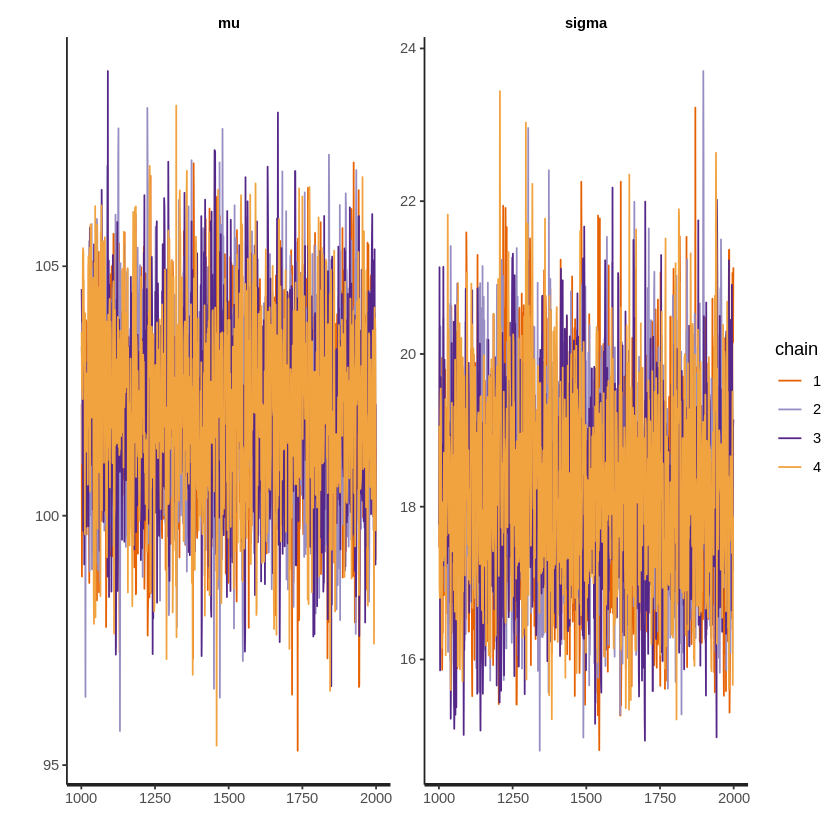

In [13]:
traceplot(mcmc_result)

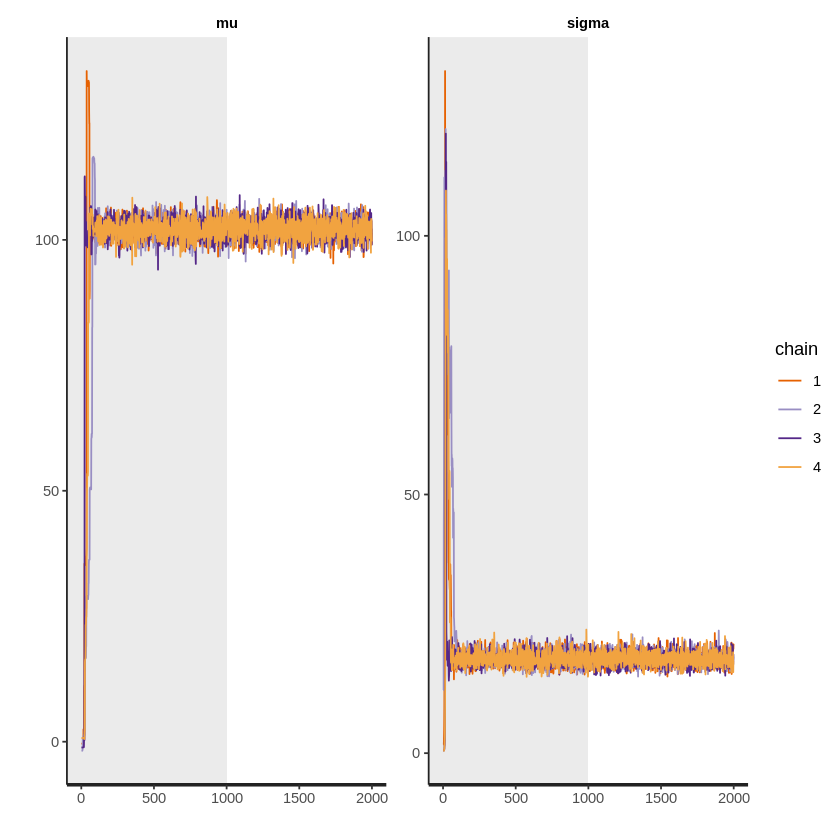

In [14]:
traceplot(mcmc_result, inc_warmup = T)

In [15]:
mcmc_result = stan(
    file = "2-4-1-calc-mean-variance.stan",
    data = data_list,
    seed = 1,
    chains = 4,
    iter = 2000,
    warmup = 1000,
    thin = 1
)

hash mismatch so recompiling; make sure Stan code ends with a blank line


In [16]:
print(
    mcmc_result,
    probs = c(0.025, 0.5, 0.975)
)

Inference for Stan model: 2-4-1-calc-mean-variance.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean   sd    2.5%     50%   97.5% n_eff Rhat
mu     102.25    0.03 1.79   98.67  102.25  105.74  3551    1
sigma   18.16    0.02 1.32   15.76   18.08   20.84  3521    1
lp__  -336.45    0.02 1.00 -339.07 -336.14 -335.47  1802    1

Samples were drawn using NUTS(diag_e) at Tue Jul 23 13:59:21 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


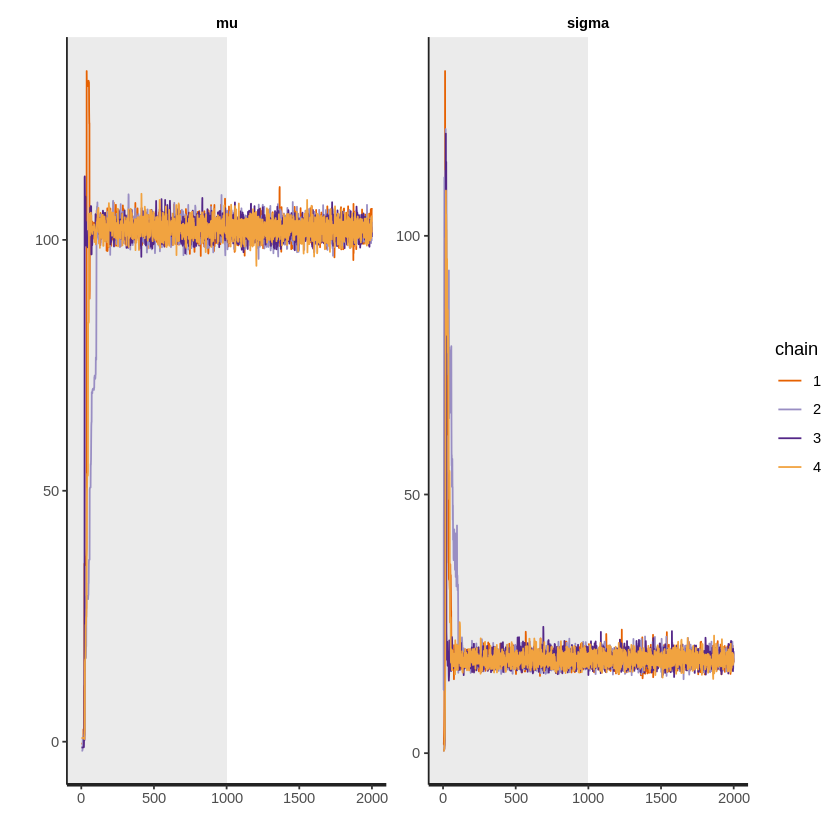

In [17]:
traceplot(mcmc_result, inc_warmup = T)

In [18]:
mcmc_sample <- rstan::extract(mcmc_result, permuted = FALSE)

In [19]:
class(mcmc_sample)

[1] "array"

In [20]:
dim(mcmc_sample)

[1] 1000    4    3

In [21]:
dimnames(mcmc_sample)

$iterations
NULL

$chains
[1] "chain:1" "chain:2" "chain:3" "chain:4"

$parameters
[1] "mu"    "sigma" "lp__"

In [22]:
mcmc_sample[1, "chain:1", "mu"]

[1] 102.792

In [23]:
mcmc_sample[123, "chain:3", "mu"]

[1] 103.082

In [24]:
mcmc_sample[501, "chain:5", "mu"]

ERROR: Error in mcmc_sample[501, "chain:5", "mu"]: subscript out of bounds


In [25]:
mcmc_sample[501, "chain:4", "lp__"]

[1] -336.0558

In [26]:
mcmc_sample[,"chain:1", "sigma"]

[1] 16.73407 18.19505 18.11137 21.08863 20.73431 19.29679 20.06262 17.99136
   [9] 16.75270 18.75873 17.42101 18.19242 19.38024 19.12958 18.88947 18.12155
  [17] 18.14219 16.88659 16.36198 20.25458 19.06552 18.95543 18.95590 19.10956
  [25] 16.27314 16.64513 18.28183 16.78935 18.64640 20.19973 17.59438 19.64260
  [33] 16.38503 18.75728 18.90018 17.40864 18.26466 18.09001 15.64400 15.64400
  [41] 16.07409 16.11449 19.07510 16.88159 19.56513 18.52106 18.10204 18.92146
  [49] 17.41052 19.45590 19.68759 19.60951 17.99190 18.16143 18.36311 17.38437
  [57] 17.65996 18.35268 18.40230 17.44944 17.42742 19.28640 16.87546 17.44334
  [65] 16.18578 16.94138 19.81398 19.68497 17.89556 19.35355 17.93634 19.18787
  [73] 17.56889 16.30651 17.64388 17.95541 17.95541 18.40195 17.84314 17.69676
  [81] 20.63014 17.45303 17.52843 18.01192 16.63207 20.36522 17.87454 18.26181
  [89] 19.35496 18.10325 16.07190 20.28578 15.99990 19.19407 16.84671 18.34167
  [97] 19.14944 18.15025 19.35777 16.44454 19.93070 19.86695 17.03515 16.90609
 [105] 16.90609 17.94773 17.65581 18.08967 17.35201 19.53034 17.27648 19.38131
 [113] 18.40951 18.61632 17.57489 17.97280 18.54595 18.90201 18.33430 17.62959
 [121] 18.64301 17.05719 23.03489 21.88874 16.23893 18.46765 18.47957 16.55041
 [129] 19.12364 16.68912 17.05265 18.93698 17.06399 17.18982 19.55480 17.88056
 [137] 18.04071 18.32385 18.51956 17.62314 18.22551 18.27730 17.98385 16.11155
 [145] 16.92372 16.90281 17.77233 17.77233 18.06897 17.35020 19.70944 18.35095
 [153] 15.89246 18.21291 17.94965 18.50604 17.46359 18.57852 18.65473 19.08460
 [161] 18.22685 18.01398 16.44276 17.87125 17.42627 18.20216 17.63911 19.88740
 [169] 18.30918 18.53185 18.66790 17.35537 16.27159 19.62527 17.52782 17.94856
 [177] 17.86487 15.85973 17.85194 19.82254 16.99109 16.62446 16.58582 18.46874
 [185] 19.28876 16.57701 19.77590 20.01429 19.40959 15.40076 17.47856 19.70594
 [193] 19.34777 16.92677 20.19215 19.92899 16.49460 17.52300 17.96470 16.90511
 [201] 19.19528 19.66338 18.44906 17.76422 19.24440 18.79961 18.28395 15.26792
 [209] 15.88772 19.16981 20.11273 18.40504 18.21142 18.50564 17.14562 18.98676
 [217] 21.94777 20.85377 19.14047 19.07763 20.25942 20.72642 18.32721 18.32721
 [225] 17.77865 17.90581 17.94226 17.75600 17.85108 23.88160 18.08156 17.56624
 [233] 17.89048 17.77255 19.27117 18.40895 18.48211 18.55996 17.57761 17.15322
 [241] 16.49715 16.09241 18.59662 18.12154 18.06431 20.64152 17.36942 17.71007
 [249] 20.38644 19.07439 20.14605 16.77986 19.08060 19.81469 20.11171 17.22317
 [257] 17.06443 17.07478 16.55040 16.67029 16.98082 18.81144 20.49613 15.64095
 [265] 20.32528 16.34662 18.76453 17.02697 16.29049 18.32517 18.43961 17.95762
 [273] 17.94670 19.52262 16.41856 19.87318 19.20950 17.44373 18.70344 18.61547
 [281] 17.07203 17.07203 17.54811 18.45122 17.54700 18.33269 15.78243 16.65240
 [289] 16.98555 17.53776 16.62306 16.75790 16.71943 18.50494 18.66423 18.43371
 [297] 18.25792 16.59419 17.44866 18.74859 18.08968 20.50243 19.26058 18.36023
 [305] 16.94604 18.16376 17.62596 17.56068 17.34498 19.23792 17.76046 20.06705
 [313] 16.22536 18.85640 18.35558 17.40433 18.35351 18.75278 18.33155 18.44437
 [321] 16.89949 17.32204 17.13792 16.33429 17.59446 18.82114 18.84274 17.44028
 [329] 18.37906 16.61958 19.30236 18.54539 18.19031 18.63645 18.63645 17.53712
 [337] 17.32938 17.35411 19.03436 16.86326 18.97663 18.86592 17.55880 19.32152
 [345] 17.19661 20.12045 17.14963 16.92117 17.71621 17.71621 17.01651 18.81326
 [353] 18.07989 18.84104 20.94641 19.04717 19.04717 18.76669 15.92457 15.71971
 [361] 15.06142 18.51477 17.92122 19.41010 19.25585 18.84312 20.27334 18.88156
 [369] 19.21670 17.72483 22.38891 15.30300 14.47402 14.84817 18.15936 16.99536
 [377] 18.98713 20.21784 17.45817 16.69101 16.69101 15.45737 16.53253 19.61350
 [385] 18.68736 17.31829 18.33790 18.74340 18.09772 17.51701 15.35446 17.71852
 [393] 16.68228 18.52565 19.16138 19.14258 17.38119 17.65738 18.27998 17.04794
 [401] 20.25417 19.93008 18.17973 15.80402 16.87257 1

In [27]:
length(mcmc_sample[, "chain:1", "mu"])

[1] 1000

In [28]:
length(mcmc_sample[,,"mu"])

[1] 4000

In [29]:
dim(mcmc_sample[,,"mu"])

[1] 1000    4

In [30]:
class(mcmc_sample[,,"mu"])

[1] "matrix"

In [31]:
mu_mcmc_vec <- as.vector(mcmc_sample[,, "mu"])

In [32]:
median(mu_mcmc_vec)

[1] 102.2455

In [33]:
mu_mcmc_vec

[1] 102.79200 102.91601 101.41863 100.90576 103.60160 101.86927 104.20413
   [8] 100.33461 102.54197 101.27950 100.01355 103.19071  98.75079  98.68233
  [15]  99.94136 106.64497 103.21796 102.61123 103.41972 105.04358 104.91949
  [22] 104.90893  99.38509 101.55679 101.04206 101.08463 102.73827  99.70585
  [29] 105.43373 103.65040 100.51470 103.29262 101.30461 100.20646 100.81405
  [36] 102.39490 101.96265 102.30090 101.50517 101.50517 102.02618 103.37888
  [43] 101.37872 100.49024 103.33554 103.96263 101.09768 104.23812 101.26360
  [50] 102.20372 103.44392 103.10600 103.68968 103.98210  97.61017  99.05135
  [57] 100.33579 100.88318 103.08892 101.29138 101.53890 102.34641 102.04484
  [64] 103.31883 101.84231 102.94283 100.80683 101.06366 101.28099  99.34777
  [71] 100.81597 100.81555  98.97429 102.75072 103.50731 100.72502 100.72502
  [78] 103.13248 103.78368  98.89486 104.62953 101.54451 101.42082 104.57398
  [85] 102.75925 101.98477 103.42881 100.71932 101.26379 104.05707  99.55606
  [92] 102.11565 101.25822 100.69950 102.53745 101.78165 100.99914  99.60094
  [99] 104.27743 100.33174 101.24513 101.28673 103.15779 103.39753 103.39753
 [106] 102.81721 101.15298 102.05567 101.65818 102.23464 104.09245 100.49281
 [113] 100.06452 101.35041 102.84636 101.43589 102.22086 101.03131 102.39220
 [120] 100.30227 103.13464 101.17182  99.12291  96.84919 104.30748 101.72877
 [127] 103.64920 103.41016 102.36004 102.20169 102.23194 104.72852 101.85588
 [134] 101.34635  99.62725 101.67061 102.97385 102.85619  98.82369 102.86630
 [141] 101.45857 102.05535 101.60611 104.42516 100.13570 104.01979 104.11912
 [148] 104.11912 100.37702 103.04285 102.47211 103.98975 102.57464 102.12329
 [155] 101.49865 102.12603 102.54136 103.91015 103.78760  99.76192 101.88077
 [162] 102.94928 102.79583 100.67897 101.27116 103.11126 103.27057 101.24535
 [169] 100.24067 103.08057 101.95498  99.47394 104.82664  99.32316 103.14739
 [176]  99.59128 104.77106 100.95569 102.96893 102.74449 102.83010 103.02526
 [183] 102.42549 102.90723 104.65991  99.85380 104.73205 102.18314 102.34839
 [190] 104.75172 103.93965 101.44605 101.55318 103.02839 105.14840 104.51658
 [197] 100.04166  99.83841 100.63867 101.90357 102.19733 101.51784 102.18342
 [204] 101.88580 102.03536 100.36984 103.55201 101.86113 101.67723 104.16146
 [211] 100.60365 102.44607 100.97473 103.37019 100.93258 103.41103 101.29929
 [218] 102.01119 105.80365 106.03738 103.63050 104.17475 102.10365 102.10365
 [225] 100.84623 103.48705 104.16390 104.88859 105.12561 101.53302 106.27051
 [232] 104.95026 104.73410 102.78223 102.13148  99.66774 105.79000 102.48458
 [239] 103.46401 104.03969 103.01354 102.65858 103.90028 105.09707 100.55846
 [246] 100.03206 103.54737 100.80616 103.80114 101.64062  98.32837  99.34701
 [253] 105.38422 102.76197 103.41154 104.53870 103.76877 102.60567 102.95683
 [260] 102.92362 102.81869  99.65128 102.05563 102.24021 103.11376 102.46718
 [267] 101.10402 103.24744 100.11440 104.09685 102.46885 102.74971 101.48963
 [274] 100.12402 103.02121 102.07424 101.92004 102.78250 100.05950 100.71005
 [281] 103.58416 103.58416 103.14982 101.73065 103.36278 100.97649 102.22980
 [288] 102.55943 102.27633  98.86840 100.95821 102.58495 103.04337 101.39253
 [295] 103.10249 103.57581 101.54106 101.67252 104.00163 100.82930 100.99815
 [302] 103.63848 101.08603 100.94180  99.87207 100.99918 102.31966 100.82341
 [309] 100.60600 102.95010 103.32119 100.11101 103.96890  99.88800 105.38994
 [316]  99.08193 105.50491 101.28105 103.07930 104.47877 100.89903 101.38149
 [323] 100.25304 102.01162 102.41986 102.76754 101.50166 102.39134 101.80311
 [330] 102.21538 102.00553 103.32257 102.21586 100.53537 100.53537 102.18274
 [337] 102.15697 103.17736 104.46026 101.84905 104.16994 102.39253 102.57626
 [344] 103.41831 105.41293  99.37141 104.95922 103.75982 104.37192 104.37192
 [351] 102.50326 101.93359 101.26853 104.19665 104.46177 100.65785 100.65785
 [358] 101.17096 102.30526 102.20228 100.92832 102.86231 102.76100 109.90981

In [34]:
mean(mu_mcmc_vec)

[1] 102.2491

In [35]:
quantile(mu_mcmc_vec, probs = c(0.025, 0.975))

2.5%    97.5% 
 98.6719 105.7413

In [37]:
install.packages("ggfortify", dependencies = TRUE)

also installing the dependencies ‘spatial’, ‘gss’, ‘stabledist’, ‘gdata’, ‘caTools’, ‘RSpectra’, ‘praise’, ‘fBasics’, ‘fastICA’, ‘rex’, ‘stringdist’, ‘maps’, ‘gplots’, ‘sandwich’, ‘urca’, ‘rARPACK’, ‘testthat’, ‘cluster’, ‘changepoint’, ‘dlm’, ‘fGarch’, ‘ggrepel’, ‘glmnet’, ‘KFAS’, ‘lintr’, ‘mapdata’, ‘MSwM’, ‘raster’, ‘ROCR’, ‘sp’, ‘strucchange’, ‘timeSeries’, ‘vars’, ‘lfda’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


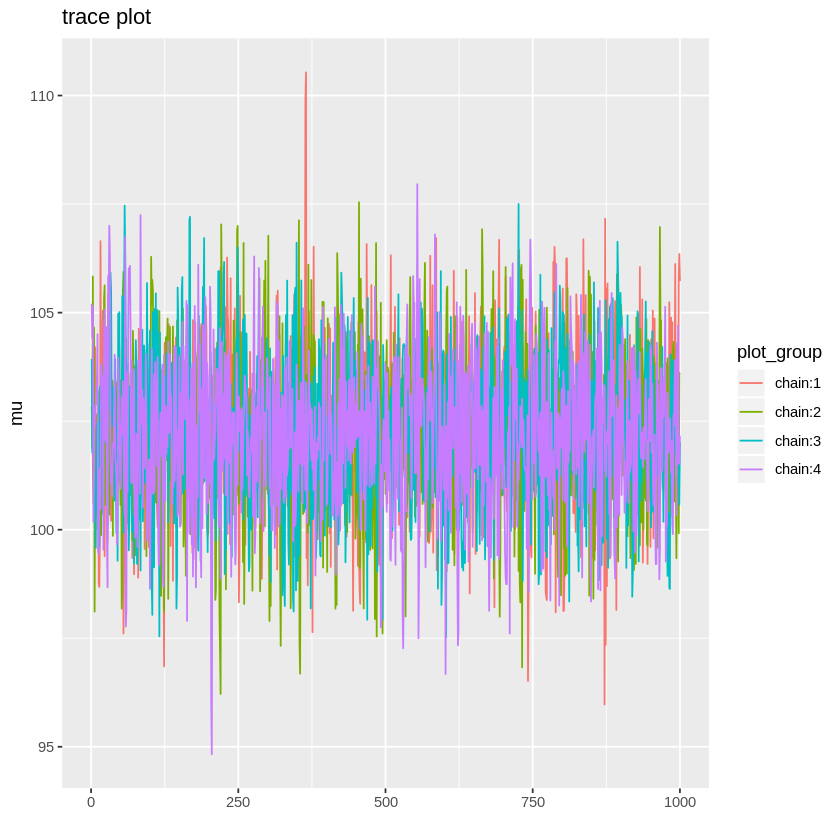

In [40]:
library(ggfortify)
autoplot(ts(mcmc_sample[,,"mu"]),
         facets = F,
         ylab = "mu",
         main = "trace plot"
)

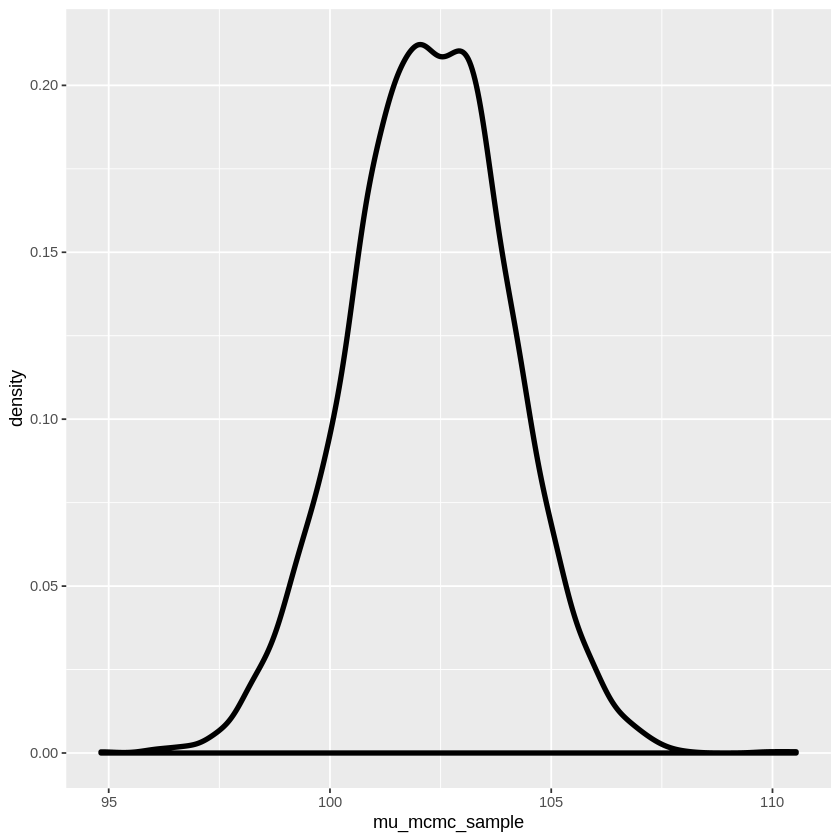

In [41]:
mu_df <- data.frame(
    mu_mcmc_sample = mu_mcmc_vec
)
ggplot(
    data = mu_df,
    mapping = aes(x = mu_mcmc_sample)
) + geom_density(size = 1.5)

In [42]:
library(bayesplot)

This is bayesplot version 1.7.0
- Online documentation and vignettes at mc-stan.org/bayesplot
- bayesplot theme set to bayesplot::theme_default()
   * Does _not_ affect other ggplot2 plots
   * See ?bayesplot_theme_set for details on theme setting


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


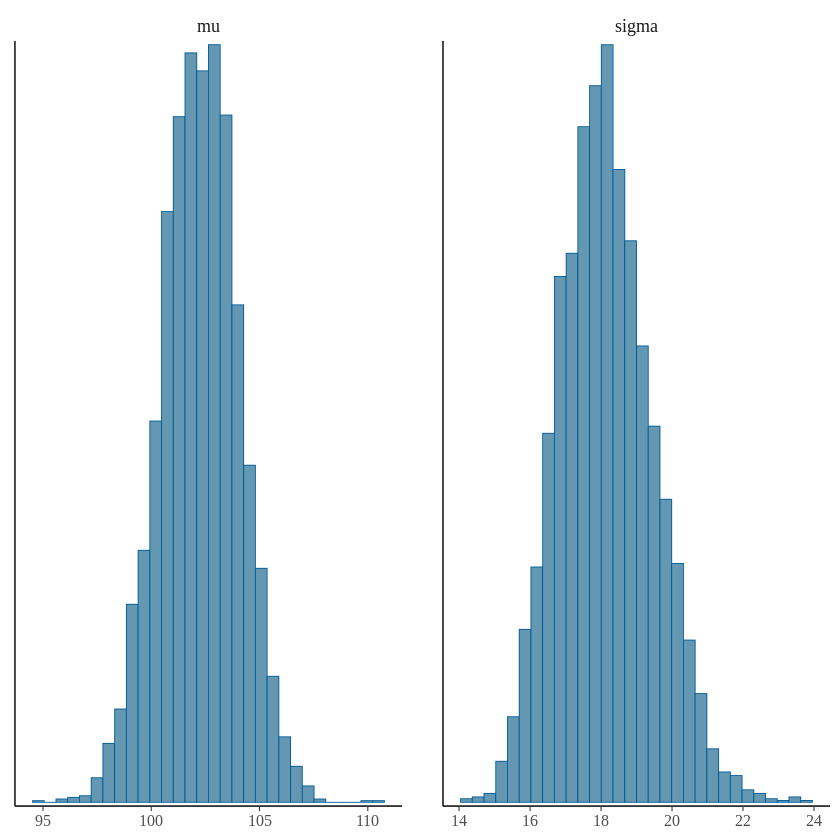

In [43]:
mcmc_hist(mcmc_sample, pars = c("mu", "sigma"))

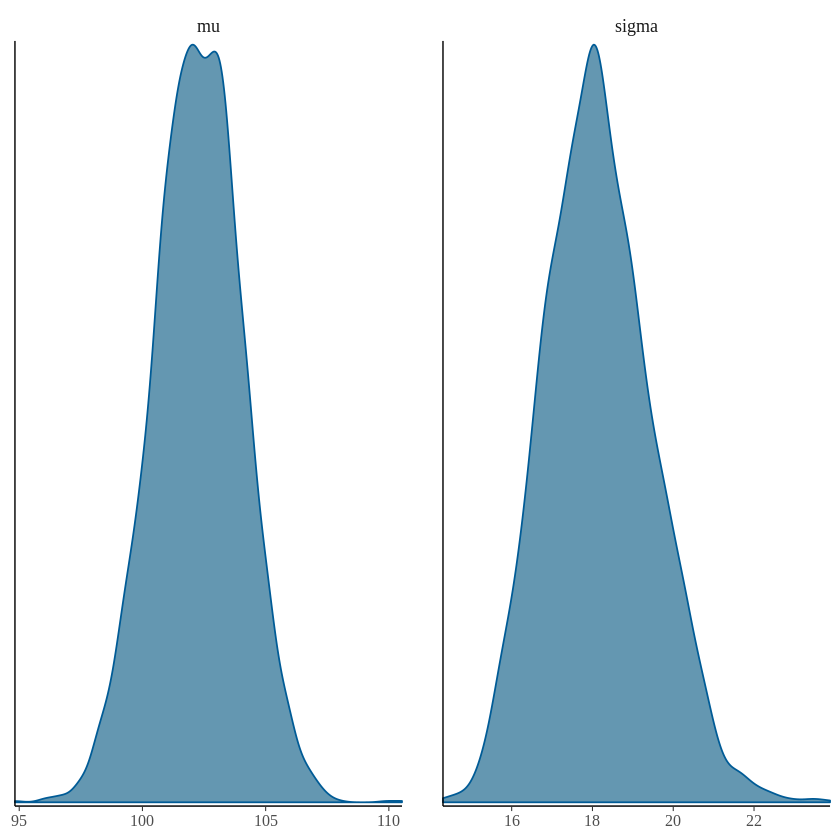

In [44]:
mcmc_dens(mcmc_sample, pars = c("mu", "sigma"))

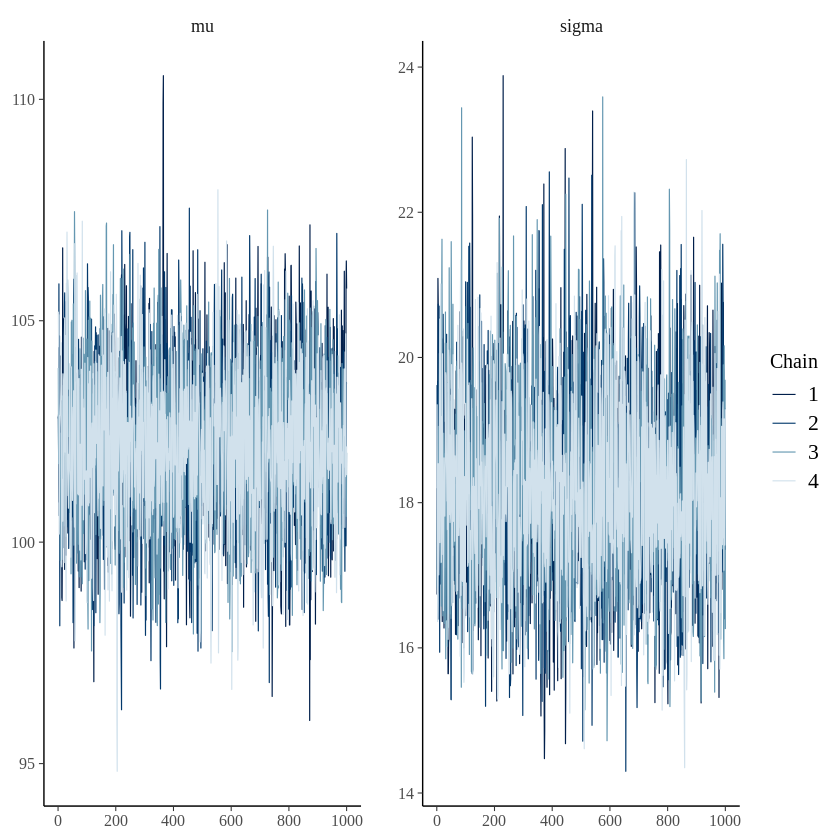

In [45]:
mcmc_trace(mcmc_sample, pars=c("mu", "sigma"))

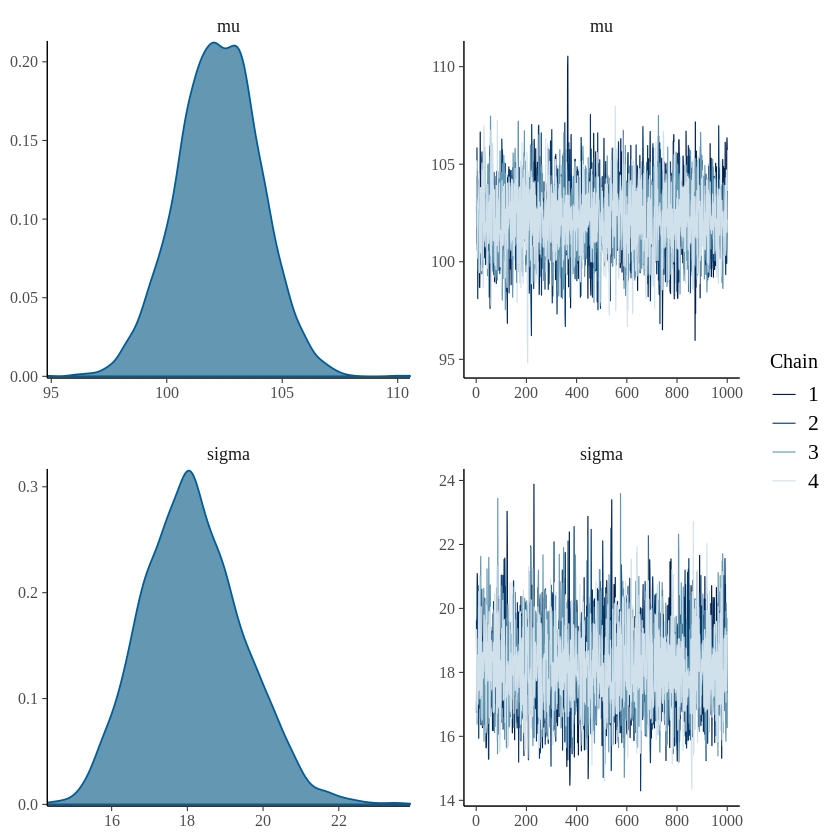

In [46]:
mcmc_combo(mcmc_sample, pars=c("mu", "sigma"))

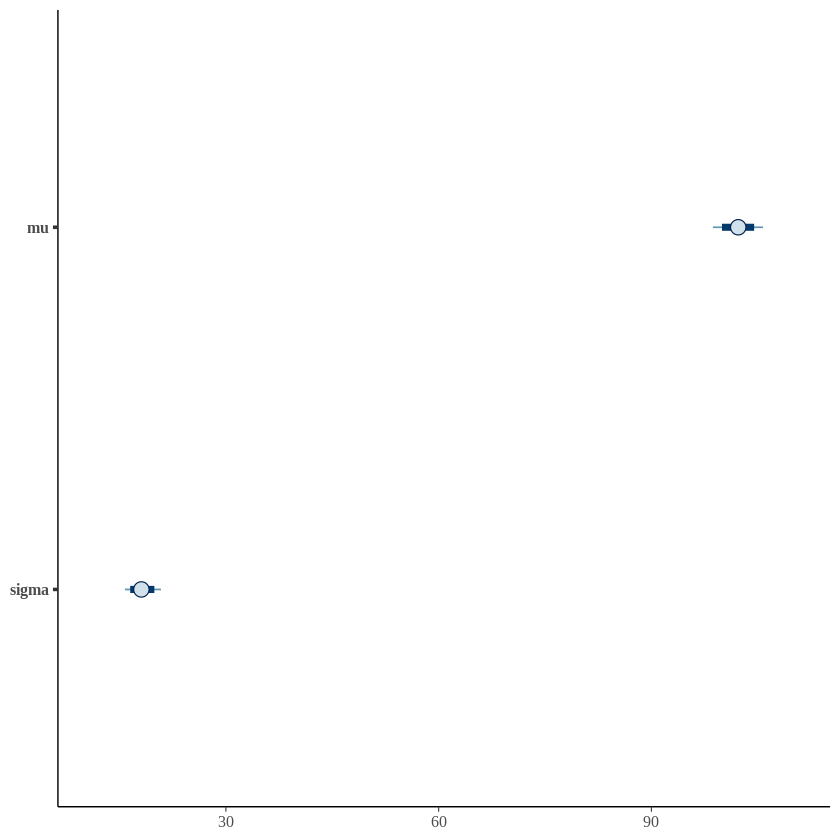

In [47]:
mcmc_intervals(
    mcmc_sample, pars = c("mu", "sigma"),
    prob = 0.8,
    prob_outer = 0.95
)

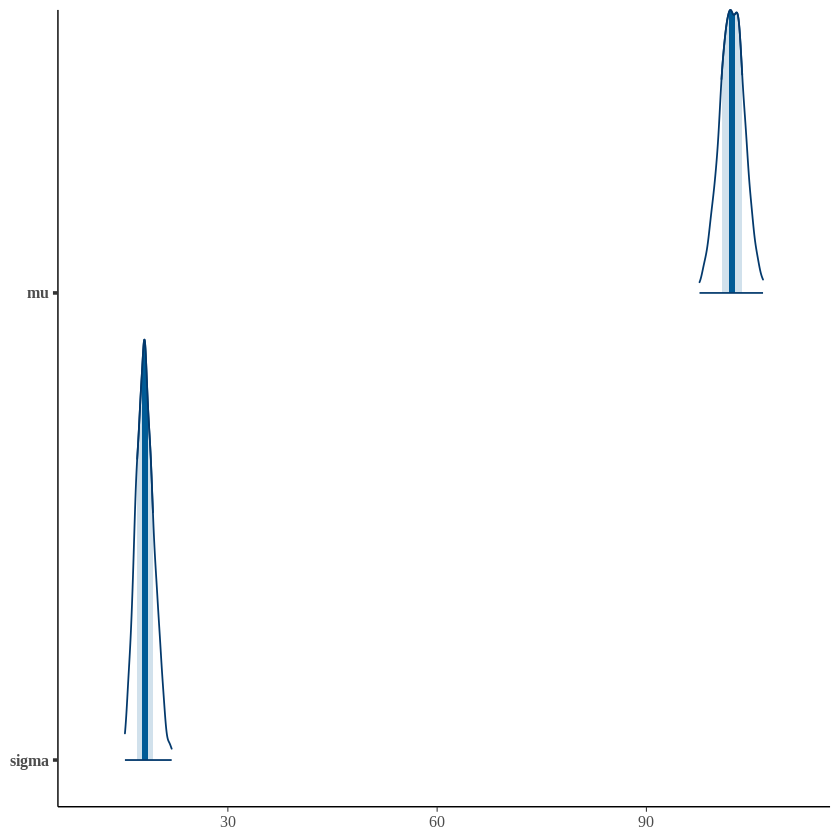

In [48]:
mcmc_areas(
    mcmc_sample, pars = c("mu", "sigma"),
    prob = 0.6,
    prob_outer = 0.99
)

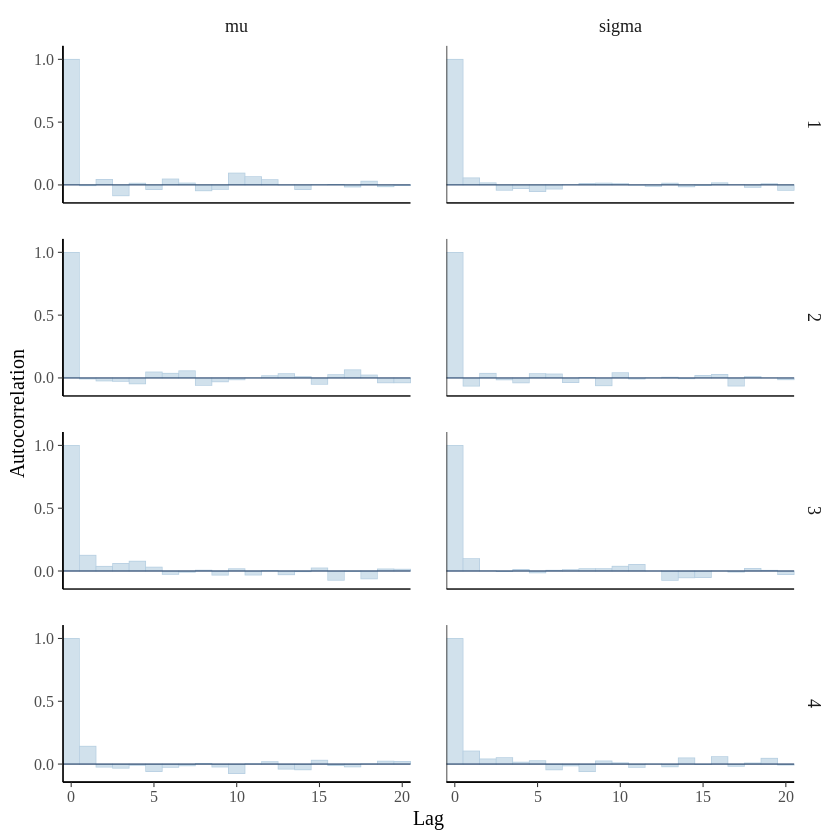

In [49]:
mcmc_acf_bar(mcmc_sample, pars = c("mu", "sigma"))

In [50]:
animal_num <- read.csv("https://raw.githubusercontent.com/logics-of-blue/book-r-stan-bayesian-model-intro/master/book-data/2-5-1-animal-num.csv")

In [51]:
head(animal_num)

animal_num
<int>
0
1
1
2
0
2


In [54]:
sample_size <- nrow(animal_num)
data_list <- list(animal_num = animal_num$animal_num, N = sample_size)
mcmc_normal <- stan(
    file = "2-5-1-normal-dist.stan",
    data = data_list,
    seed = 1
)

mcmc_poisson <- stan(
    file = "2-5-2-poisson-dist.stan",
    data = data_list,
    seed = 1    
)

In [56]:
y_rep_normal <- rstan::extract(mcmc_normal)$pred
y_rep_poission <- rstan::extract(mcmc_poisson)$pred

dim(y_rep_normal)

[1] 4000  200

In [57]:
y_rep_normal[1,]

[1]  1.3883813427  0.2743276279  0.6821068637  2.5299630842 -0.1693481155
  [6]  1.3155544172  0.8378447270  1.1856380029  0.9942250359  1.6501593226
 [11]  1.9120079908  0.9012308870 -0.1932518952  2.1808943550  0.9324961204
 [16]  1.6879188725  1.0513875810  1.3750651504  0.0493522509  1.6193329509
 [21]  1.6110476543 -0.5374354082  1.3381733697  1.1878244223  2.6612125989
 [26]  0.4682973593  1.3605653798  1.6812945949 -0.3029028342 -0.3472737645
 [31]  1.0946877005  1.9899872676  2.2117152293  3.3230088443  1.3649322289
 [36]  1.5379488342 -0.3773147167  1.3954879014  1.2106214998  1.9310171117
 [41]  0.2439160055  1.6998749530  1.5887572140  1.5168293924  2.0300642345
 [46]  0.6646128721  1.1689189355  0.9719893324  2.9088041863  1.8206302000
 [51]  1.3897410755  0.5449821290  1.3946934436  2.7124916550  0.3367941240
 [56]  1.4020089906  2.4868541626  1.0595930499  0.6170223347  1.3714878750
 [61]  2.5891736627 -0.0147329222 -0.3717379972  2.8451261171 -0.6023053372
 [66]  1.4738207813  3.5762293306 -0.0008662262  0.6414368701  0.2836223043
 [71]  1.8677312678 -0.7164438076  1.8573978004  2.6886600962  1.7063503844
 [76]  0.5880656179  0.5855774993  3.1152248565  1.4184881236 -1.1204665541
 [81]  1.2880092648 -0.1946606190  1.6691213234  1.9802779991  2.6981682590
 [86]  1.9854761069  1.5425177664  1.6511224091  0.8477072934 -1.6360542788
 [91]  1.5741109958  1.5845137881  0.1409695815  1.0141014932  1.3459599117
 [96]  0.4678381022  0.7738603082  1.8614856659  2.3899650959 -0.3604080610
[101] -0.9432589638  1.0466478995  0.9470850951  1.5553514932  0.4841984892
[106]  3.9620122474 -0.4862374028  0.5702494292  0.0962135054  1.1722342180
[111]  1.3100829879  1.7087857802  2.1248181237  1.1286499599  0.4743566513
[116] -0.1553111600  2.0218390499  0.1916490615  1.3608001131  1.0549439049
[121]  1.0926740609  0.4197963983  2.0198440646  1.7311472212  1.9461223194
[126]  1.1376146478 -0.7838274401  0.7280378923  1.4866010694 -0.1583549945
[131]  3.4254195455  0.2781623129  0.8791484426 -0.2139640285 -0.6457999217
[136]  0.1934512547  3.1363729616  2.1848887204  0.5220746891  0.8037653986
[141]  1.6524644681  0.9104012768  0.5665742862  0.1495142021  0.1477889599
[146]  2.5068136075  0.9828873696  1.7146792818  1.0189217684  1.7918785106
[151]  2.2971300776  0.7285371024  1.8298361966  0.9895809491  0.8789468193
[156]  2.5426077549  1.2597472462 -1.4446660083  0.1870766847 -0.3871219417
[161]  2.2082594232  0.0425767754  0.6347892877  0.8616550456  0.6246182922
[166]  0.2046563202 -0.4271629484  2.0604734394  2.4228579677  1.9481358244
[171] -0.7154443199  1.8015556249  1.7783788193 -0.0791750764  0.6227050648
[176] -0.4788182847 -0.3642222721  1.5470307626  3.4522617739  1.8571352985
[181]  1.5915256967  2.1825256311  1.7160352754  0.4365570161  1.8308407695
[186]  1.4318743293  0.1666789818  3.1167750532  0.3286128197  1.6322336069
[191]  0.4917525757  1.4051427487  1.2660177312 -0.3448052135  2.3125977193
[196]  0.4660829311  2.3109890338  1.3271680477  0.3723466715  0.5899068858

In [58]:
y_rep_poission[1,]

[1] 1 2 0 0 3 0 0 0 0 4 1 1 0 1 1 2 0 0 2 3 0 0 1 2 0 0 0 0 0 1 0 3 3 0 2 1 1
 [38] 1 1 0 0 1 1 0 1 0 0 1 2 1 2 0 1 0 1 0 3 3 0 1 2 0 0 0 2 0 2 1 1 0 1 1 0 0
 [75] 2 0 2 3 3 1 1 0 0 0 0 0 1 1 1 3 0 0 2 0 0 0 0 2 1 1 1 1 1 0 0 3 1 1 1 0 1
[112] 1 0 3 1 2 2 0 0 2 1 1 1 2 1 0 0 2 1 0 1 0 0 3 0 0 3 1 0 2 5 1 0 0 0 2 1 1
[149] 1 0 1 0 2 0 0 2 0 1 1 1 1 3 0 1 1 1 1 1 0 1 3 0 1 2 1 1 1 0 0 0 1 0 1 0 0
[186] 1 1 2 1 1 0 0 1 1 0 0 0 0 2 1

In [59]:
data_list

$animal_num
  [1] 0 1 1 2 0 2 3 1 1 0 0 0 1 1 2 1 1 4 1 2 3 0 1 0 0 1 0 1 2 0 1 1 1 0 2 1 2
 [38] 0 1 1 2 1 2 1 1 2 0 1 1 1 1 2 1 0 0 0 0 1 1 1 2 0 1 0 1 0 1 2 0 2 0 2 0 0
 [75] 1 2 2 1 2 3 1 1 1 0 2 0 1 0 0 0 0 0 1 2 2 2 1 1 2 1 1 0 0 4 1 0 0 1 3 1 3
[112] 1 0 1 0 0 1 0 1 1 4 1 1 0 2 1 1 0 0 1 1 0 0 1 3 1 1 1 4 1 1 1 0 0 1 1 0 2
[149] 0 2 1 1 0 1 1 0 1 0 0 0 0 2 1 2 2 1 0 0 1 0 1 2 2 1 1 2 1 2 1 2 0 0 2 1 2
[186] 0 2 1 3 1 1 1 0 3 0 1 0 2 0 2

$N
[1] 200

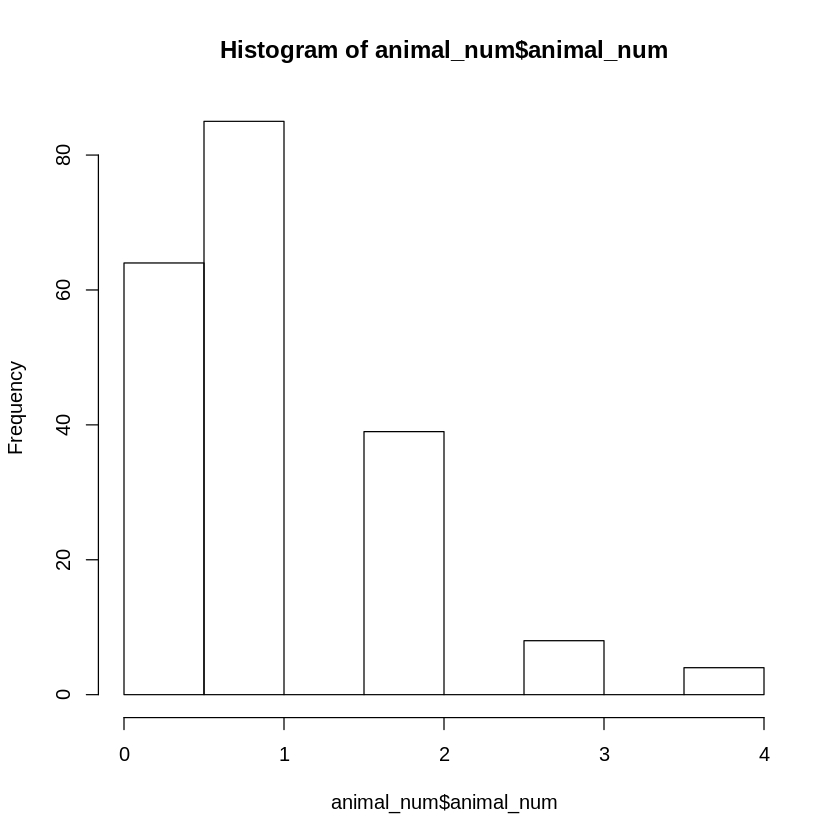

In [60]:
hist(animal_num$animal_num)

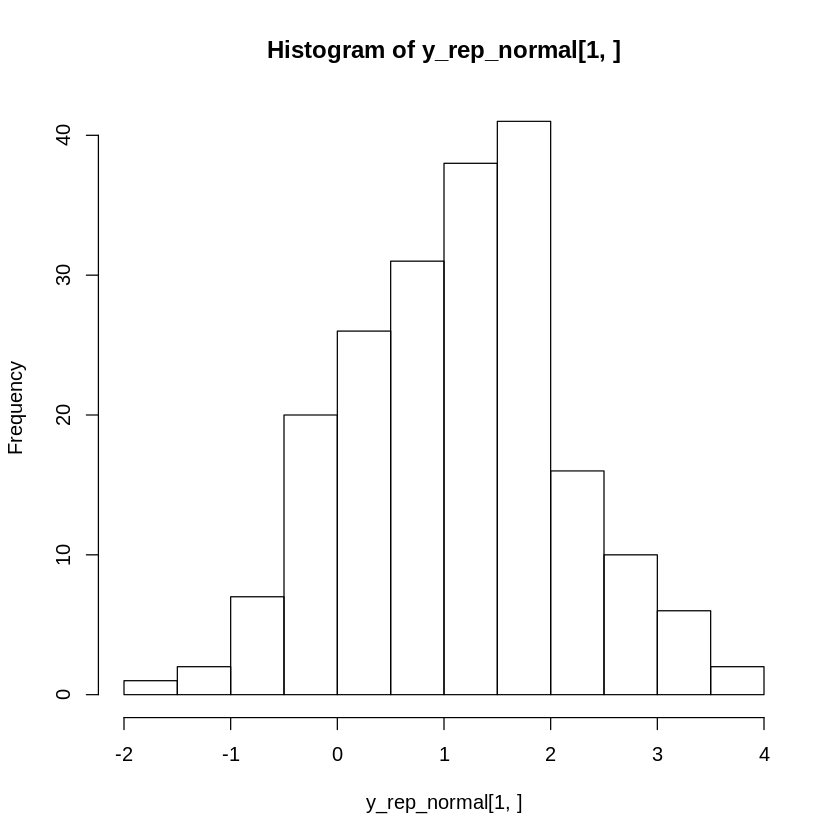

In [61]:
hist(y_rep_normal[1,])

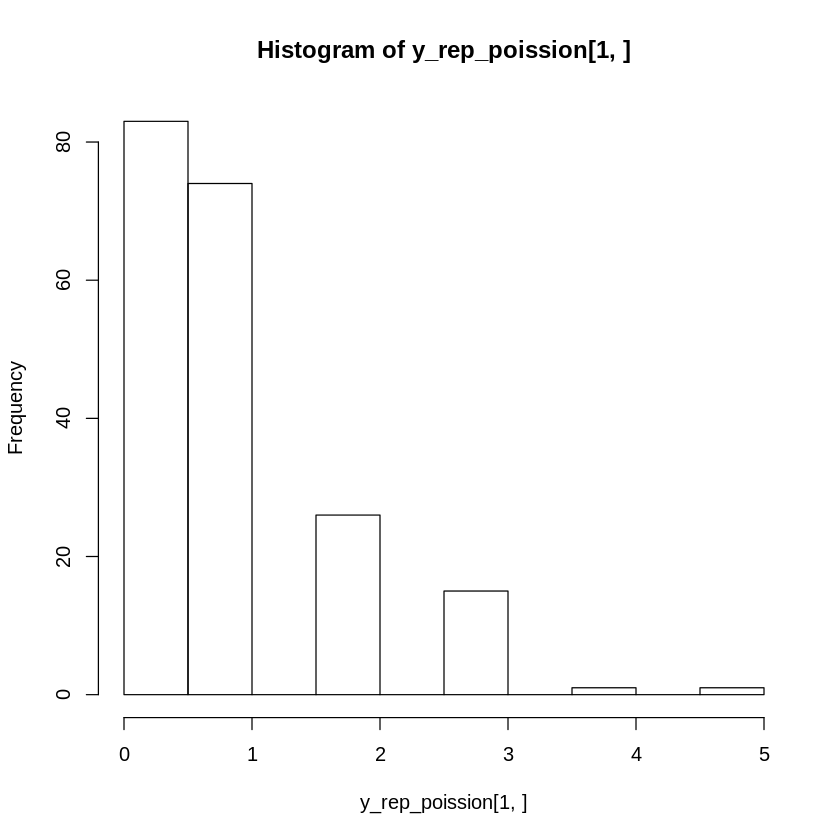

In [63]:
hist(y_rep_poission[1,])

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


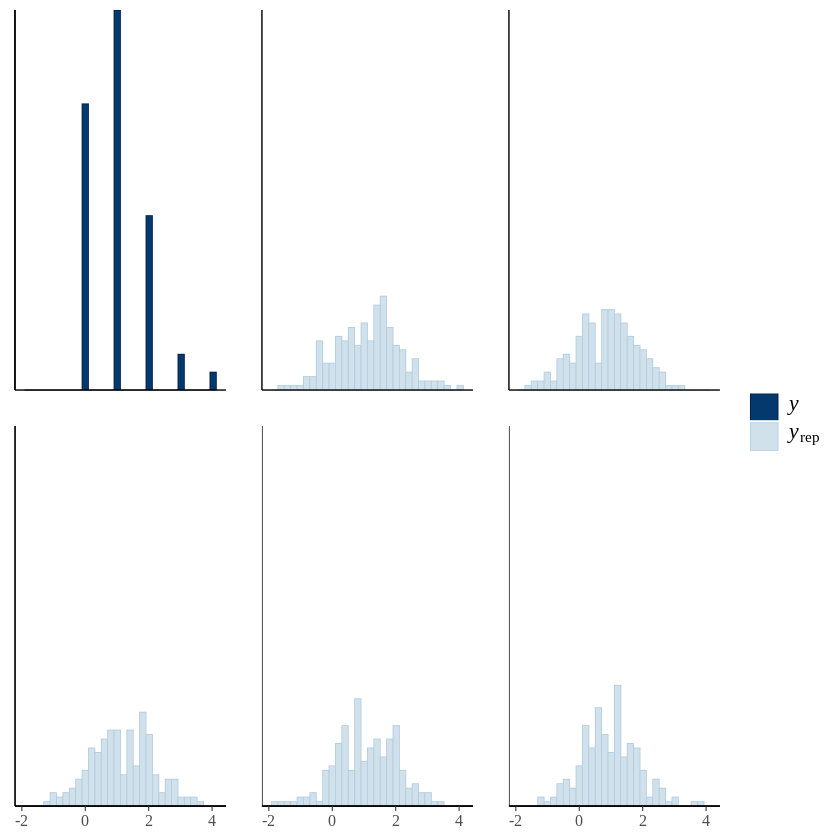

In [64]:
ppc_hist(y = animal_num$animal_num, yrep = y_rep_normal[1:5, ])

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


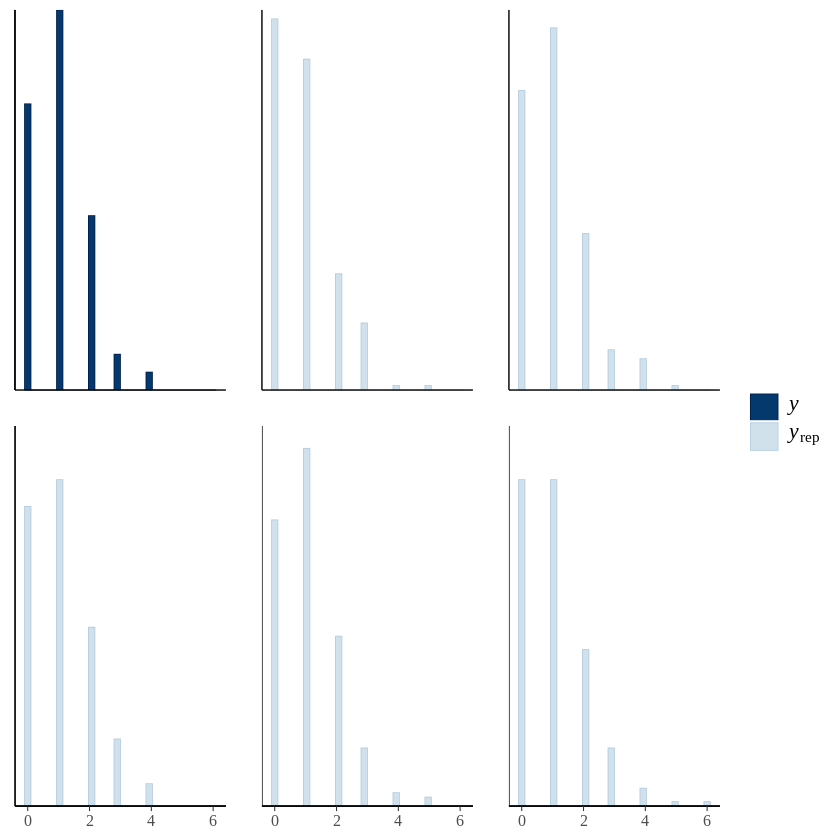

In [65]:
ppc_hist(y = animal_num$animal_num, yrep = y_rep_poission[1:5, ])